In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer

In [2]:
df = pd.read_csv('../../data/processed_data/user_agg_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  object 
 1   recency           10000 non-null  int64  
 2   total_trips       10000 non-null  int64  
 3   total_spend       10000 non-null  float64
 4   avg_spend         10000 non-null  float64
 5   avg_surge         10000 non-null  float64
 6   total_tip         10000 non-null  float64
 7   avg_tip           10000 non-null  float64
 8   avg_rating_given  10000 non-null  float64
 9   loyalty_status    10000 non-null  object 
 10  city              10000 non-null  object 
 11  avg_distance      10000 non-null  float64
 12  avg_duration      10000 non-null  float64
 13  active_days       10000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


### Handling Outliers

#### Transformation of columns

From the exploration of the numberical columns in the previous notebook, we  uncovered that all the numeric columns have outliers in them. Thus we would handle the outliers by transforming them using Yeo-Johnson Transformation.

In [3]:
encoded_df = df.copy()
num_cols = df.select_dtypes(include='number').columns

pt = PowerTransformer(method='yeo-johnson', standardize=True)

encoded_df[num_cols] = pt.fit_transform(encoded_df[num_cols])

In [4]:
df

,user_id,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,city,avg_distance,avg_duration,active_days
0,R00000,26,25,366.05,14.642000,1.096000,4.03,0.161200,5.0,Bronze,Nairobi,3.945572,30.320000,336
1,R00001,6,14,180.53,12.895000,1.071429,0.76,0.054286,4.7,Bronze,Nairobi,4.056645,28.642857,346
2,R00002,15,24,378.99,15.791250,1.191667,5.21,0.217083,4.2,Bronze,Lagos,4.533116,31.541667,298
3,R00003,62,9,121.47,13.496667,1.155556,0.87,0.096667,4.9,Bronze,Nairobi,4.837392,32.555556,285
4,R00004,13,16,268.43,16.776875,1.262500,9.38,0.586250,3.9,Silver,Lagos,4.677326,36.125000,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R09995,2,13,203.15,15.626923,1.146154,3.22,0.247692,4.4,Silver,Lagos,4.059048,31.384615,323
9996,R09996,3,15,206.71,13.780667,1.033333,10.64,0.709333,4.1,Silver,Cairo,4.391304,30.666667,268
9997,R09997,47,18,309.83,17.212778,1.105556,4.67,0.259444,4.7,Bronze,Lagos,4.506350,31.722222,317
9998,R09998,20,22,342.05,15.547727,1.150000,10.54,0.479091,3.8,Bronze,Cairo,3.537999,35.681818,335


### Confirming removal of outliers

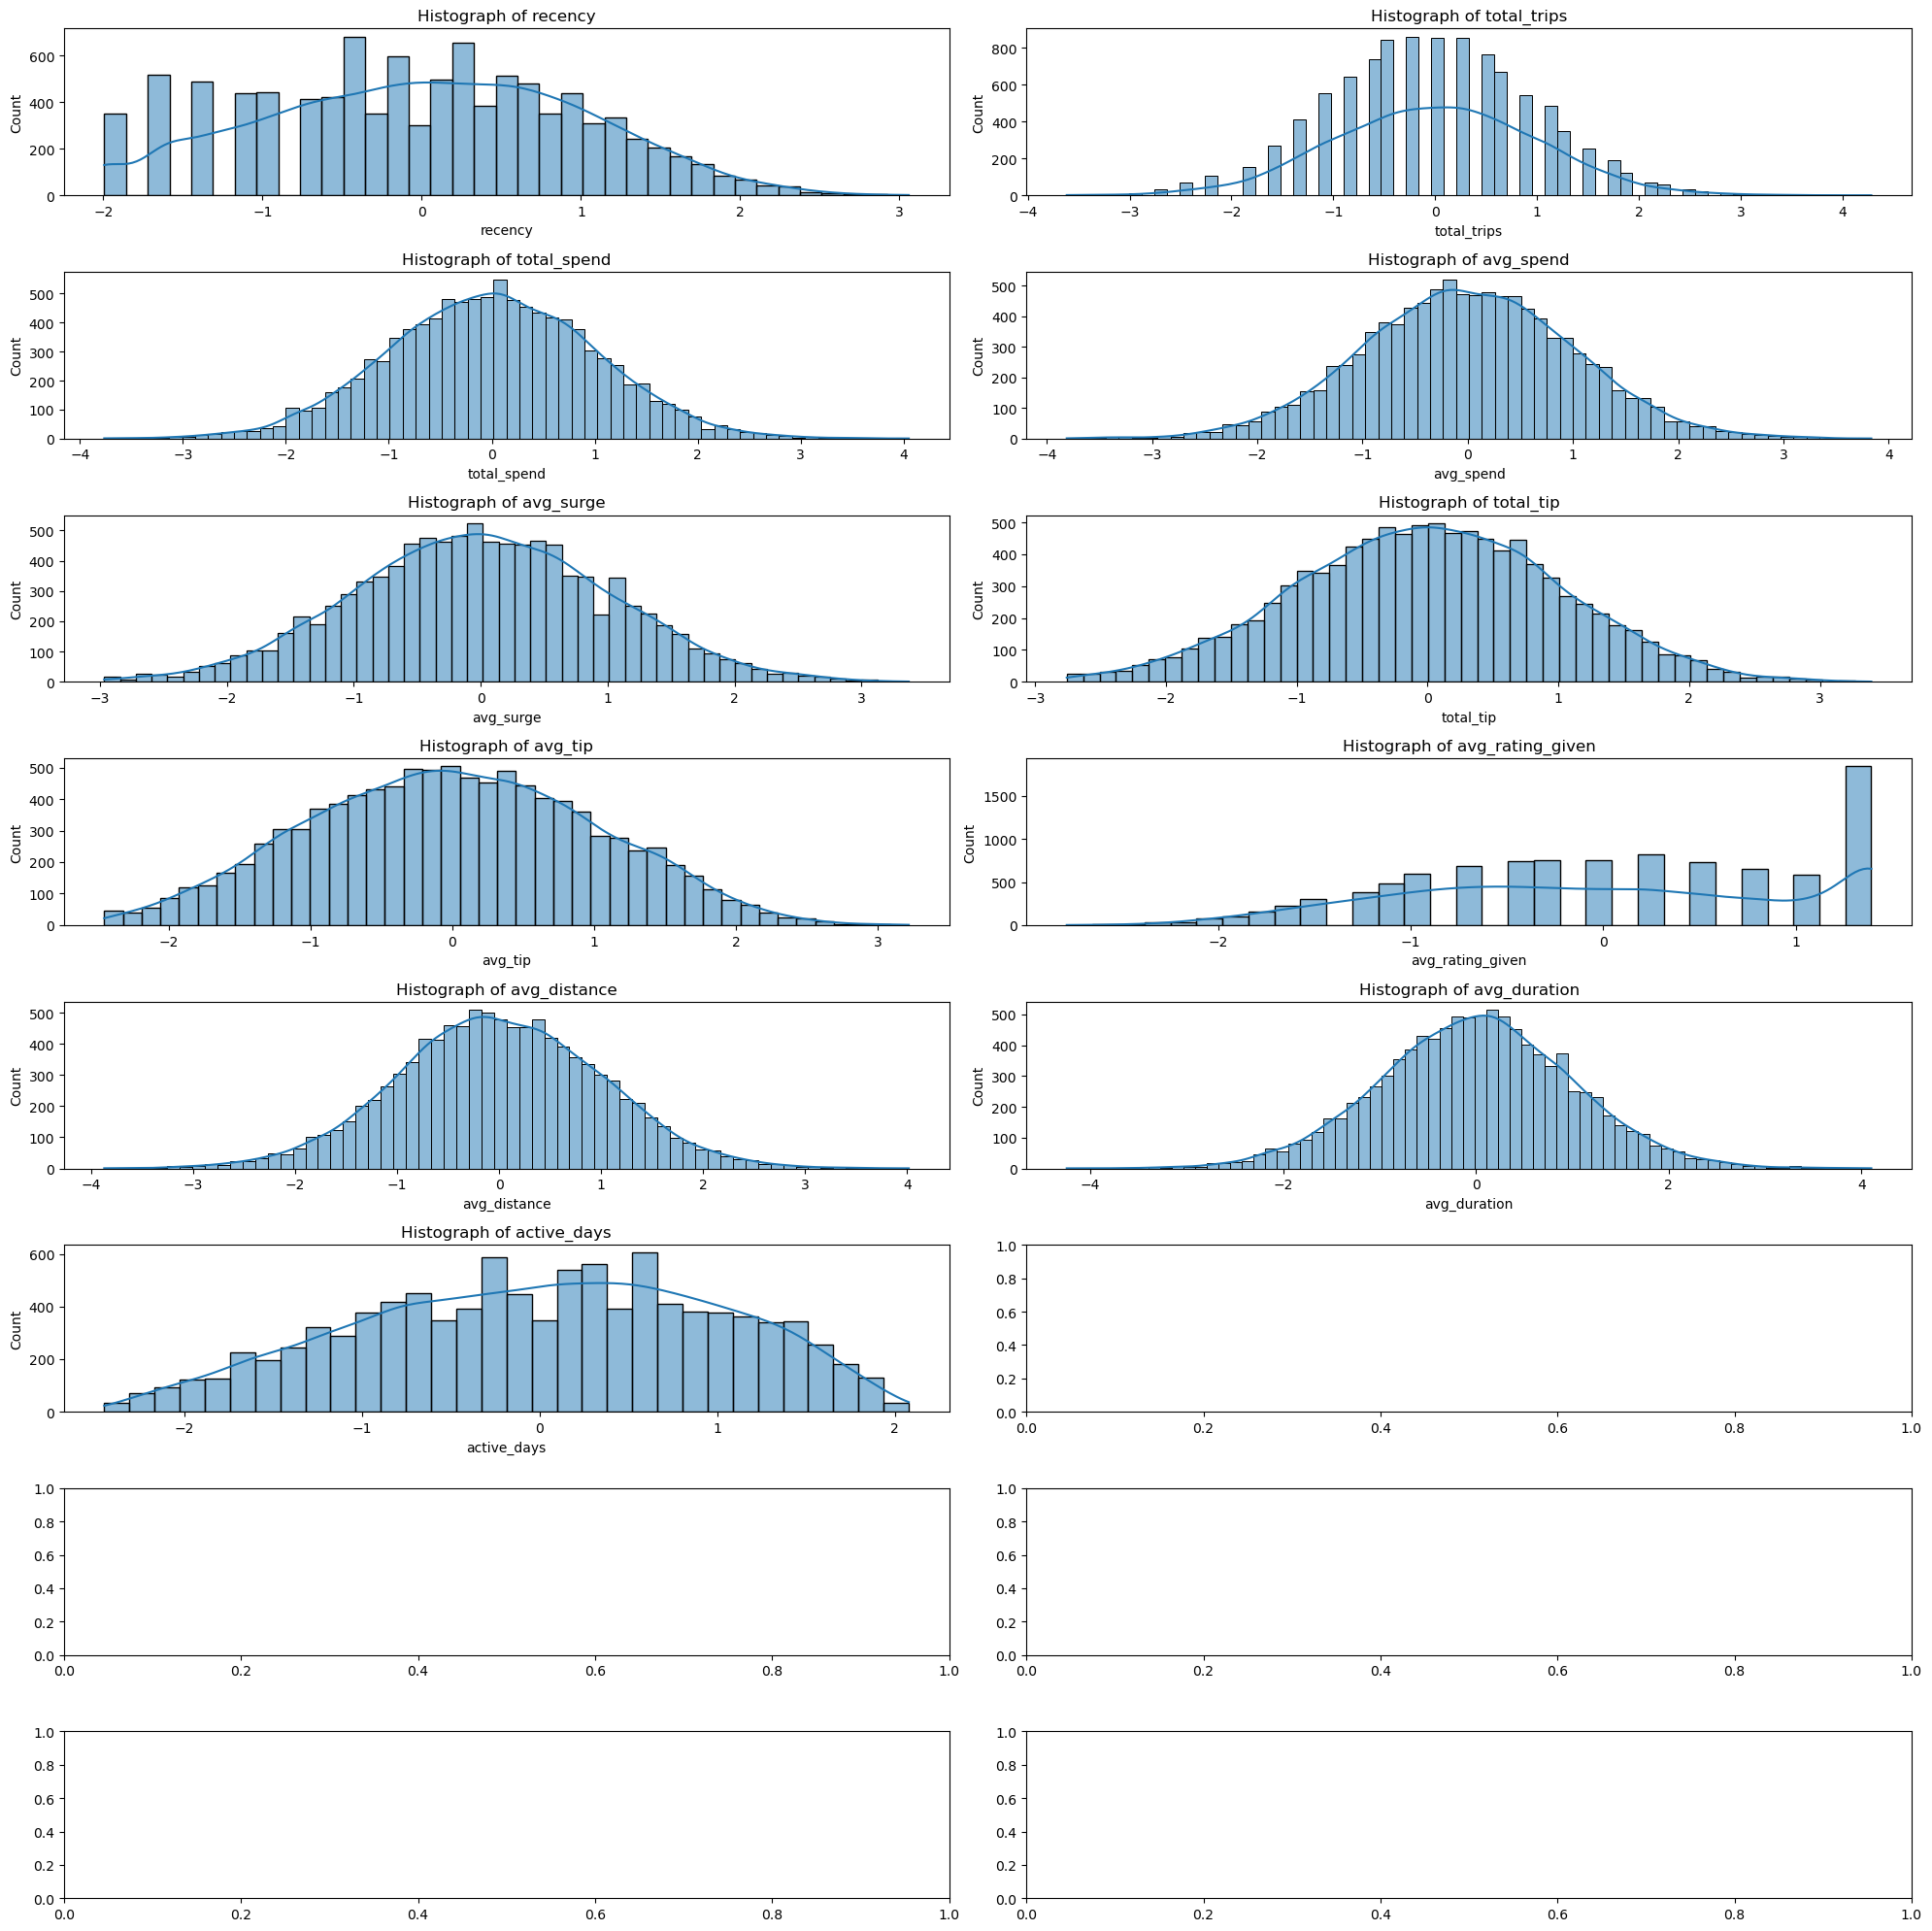

In [5]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20,20))
ax = ax.flatten()
for idx, column in enumerate(num_cols):
        sns.histplot(encoded_df[column], ax=ax[idx], kde=True)
        ax[idx].set_title(f"Histograph of {column}")
plt.tight_layout()
plt.show();

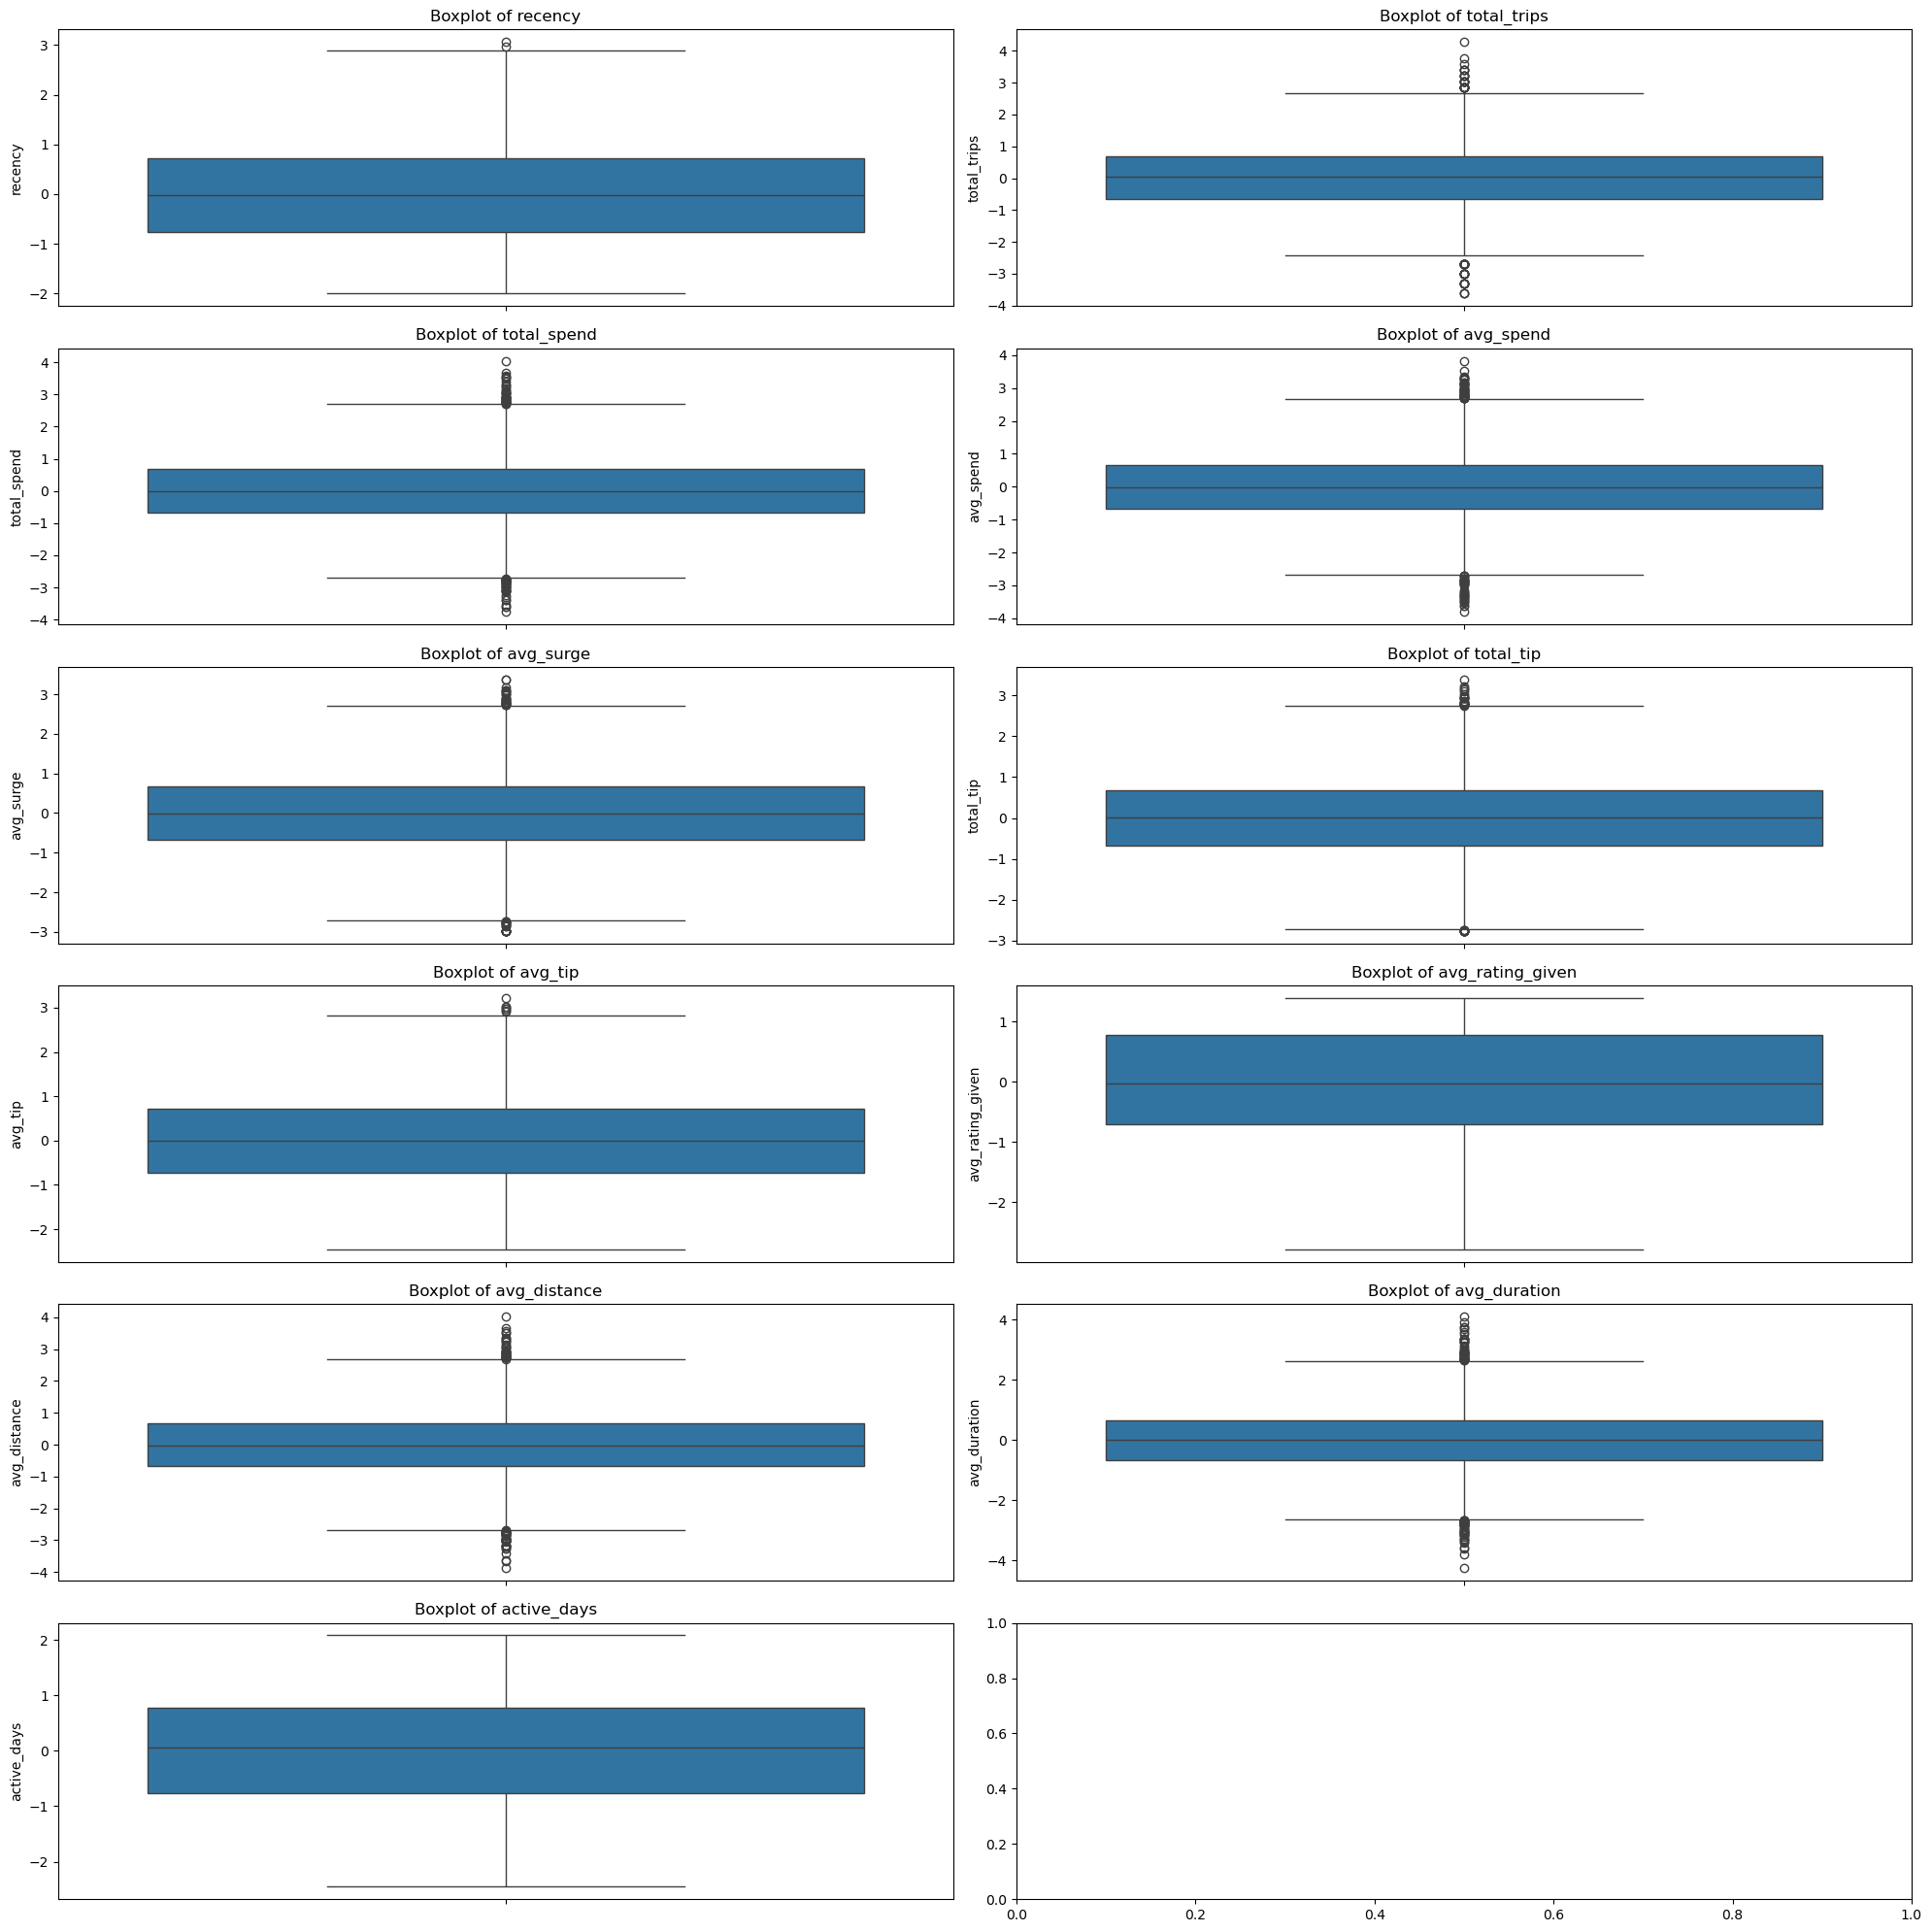

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20,20))
ax = ax.flatten()

for idx, column in enumerate(num_cols):
    sns.boxplot(y=encoded_df[column], ax=ax[idx])
    ax[idx].set_title(f"Boxplot of {column}")
plt.tight_layout()
plt.show();

##### Why are there still outliers in my data?

Outliers remained after Yeo–Johnson because the transformation is designed to reduce skewness rather than remove valid extreme observations. This was intentional, as high-value users are business-critical and should influence segmentation and churn risk, but not dominate model learning.

### Encoding Categorical Columns

In [7]:
encoded_df = pd.get_dummies(encoded_df, columns=['city'])
encoded_df

,user_id,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,avg_distance,avg_duration,active_days,city_Cairo,city_Lagos,city_Nairobi
0,R00000,0.725700,1.103351,0.794817,-0.499658,-0.759574,-0.911095,-1.267542,1.393362,Bronze,-0.536274,-0.450435,0.152047,False,False,True
1,R00001,-0.754103,-1.367833,-1.825142,-1.950589,-1.264932,-2.200264,-2.009467,0.496500,Bronze,-0.246856,-0.913345,0.716828,False,False,True
2,R00002,0.133441,0.896533,0.954515,0.336428,0.893605,-0.606259,-0.937016,-0.710379,Bronze,1.006250,-0.113299,-1.287535,False,True,False
3,R00003,1.737832,-2.701402,-2.873643,-1.423297,0.322925,-2.135196,-1.696113,1.078783,Bronze,1.815869,0.166462,-1.589425,False,False,True
4,R00004,-0.013848,-0.880254,-0.492573,0.991993,1.856757,0.212262,0.608739,-1.283930,Silver,1.389081,1.151136,-0.324979,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R09995,-1.605979,-1.620170,-1.461256,0.221870,0.164331,-1.152389,-0.769881,-0.267717,Silver,-0.240582,-0.156637,-0.452736,False,True,False
9996,R09996,-1.323068,-1.121358,-1.405491,-1.184946,-2.126500,0.410511,0.961542,-0.913147,Silver,0.631371,-0.354763,-1.882559,True,False,False
9997,R09997,1.405636,-0.412521,0.073013,1.265890,-0.572845,-0.739941,-0.708107,0.496500,Bronze,0.935374,-0.063476,-0.688852,False,True,False
9998,R09998,0.438205,0.473924,0.492523,0.166092,0.229734,0.395370,0.247981,-1.452866,Bronze,-1.589034,1.028899,0.100596,True,False,False


In [8]:
encoded_df_label = encoded_df.copy()
le = LabelEncoder()
encoded_df_label['loyalty_status'] = le.fit_transform(encoded_df_label['loyalty_status'])
encoded_df_label

,user_id,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,avg_distance,avg_duration,active_days,city_Cairo,city_Lagos,city_Nairobi
0,R00000,0.725700,1.103351,0.794817,-0.499658,-0.759574,-0.911095,-1.267542,1.393362,0,-0.536274,-0.450435,0.152047,False,False,True
1,R00001,-0.754103,-1.367833,-1.825142,-1.950589,-1.264932,-2.200264,-2.009467,0.496500,0,-0.246856,-0.913345,0.716828,False,False,True
2,R00002,0.133441,0.896533,0.954515,0.336428,0.893605,-0.606259,-0.937016,-0.710379,0,1.006250,-0.113299,-1.287535,False,True,False
3,R00003,1.737832,-2.701402,-2.873643,-1.423297,0.322925,-2.135196,-1.696113,1.078783,0,1.815869,0.166462,-1.589425,False,False,True
4,R00004,-0.013848,-0.880254,-0.492573,0.991993,1.856757,0.212262,0.608739,-1.283930,3,1.389081,1.151136,-0.324979,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R09995,-1.605979,-1.620170,-1.461256,0.221870,0.164331,-1.152389,-0.769881,-0.267717,3,-0.240582,-0.156637,-0.452736,False,True,False
9996,R09996,-1.323068,-1.121358,-1.405491,-1.184946,-2.126500,0.410511,0.961542,-0.913147,3,0.631371,-0.354763,-1.882559,True,False,False
9997,R09997,1.405636,-0.412521,0.073013,1.265890,-0.572845,-0.739941,-0.708107,0.496500,0,0.935374,-0.063476,-0.688852,False,True,False
9998,R09998,0.438205,0.473924,0.492523,0.166092,0.229734,0.395370,0.247981,-1.452866,0,-1.589034,1.028899,0.100596,True,False,False


In [9]:
df.groupby('loyalty_status').count()['user_id']

loyalty_status
Bronze      6057
Gold        1050
Platinum     468
Silver      2425
Name: user_id, dtype: int64

In [10]:
encoded_df_label.groupby('loyalty_status').count()['user_id']

loyalty_status
0    6057
1    1050
2     468
3    2425
Name: user_id, dtype: int64

Label encoding works best for ordinal data, where the assigned numbers reflect the order. However, the labels are assigned in alphabetical order not based on the inherent ranking. This is why encoded values may appear non-sequential when viewed top-down in a DataFrame.

This treats the labels as if “Silver > Platinum > Gold > Bronze”. This imposes a fake ranking that don't exist and can mislead the model, producing wrong coefficients and predictions. 

In [11]:
status_order = {
    'Bronze': 0, 
    'Silver': 1, 
    'Gold': 2, 
    'Platinum': 3
}

encoded_df['loyalty_status'] = encoded_df['loyalty_status'].map(status_order)
encoded_df

,user_id,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,avg_distance,avg_duration,active_days,city_Cairo,city_Lagos,city_Nairobi
0,R00000,0.725700,1.103351,0.794817,-0.499658,-0.759574,-0.911095,-1.267542,1.393362,0,-0.536274,-0.450435,0.152047,False,False,True
1,R00001,-0.754103,-1.367833,-1.825142,-1.950589,-1.264932,-2.200264,-2.009467,0.496500,0,-0.246856,-0.913345,0.716828,False,False,True
2,R00002,0.133441,0.896533,0.954515,0.336428,0.893605,-0.606259,-0.937016,-0.710379,0,1.006250,-0.113299,-1.287535,False,True,False
3,R00003,1.737832,-2.701402,-2.873643,-1.423297,0.322925,-2.135196,-1.696113,1.078783,0,1.815869,0.166462,-1.589425,False,False,True
4,R00004,-0.013848,-0.880254,-0.492573,0.991993,1.856757,0.212262,0.608739,-1.283930,1,1.389081,1.151136,-0.324979,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R09995,-1.605979,-1.620170,-1.461256,0.221870,0.164331,-1.152389,-0.769881,-0.267717,1,-0.240582,-0.156637,-0.452736,False,True,False
9996,R09996,-1.323068,-1.121358,-1.405491,-1.184946,-2.126500,0.410511,0.961542,-0.913147,1,0.631371,-0.354763,-1.882559,True,False,False
9997,R09997,1.405636,-0.412521,0.073013,1.265890,-0.572845,-0.739941,-0.708107,0.496500,0,0.935374,-0.063476,-0.688852,False,True,False
9998,R09998,0.438205,0.473924,0.492523,0.166092,0.229734,0.395370,0.247981,-1.452866,0,-1.589034,1.028899,0.100596,True,False,False


In [12]:
encoded_df.groupby('loyalty_status').count()['user_id']

loyalty_status
0    6057
1    2425
2    1050
3     468
Name: user_id, dtype: int64

To circumvent this, manual encoding was applied to the loyalty_status to maintain the inherent ranking in the data. From the above we can see that now “Platinum > Gold > Silver > Bronze”.

In [13]:
df

,user_id,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,city,avg_distance,avg_duration,active_days
0,R00000,26,25,366.05,14.642000,1.096000,4.03,0.161200,5.0,Bronze,Nairobi,3.945572,30.320000,336
1,R00001,6,14,180.53,12.895000,1.071429,0.76,0.054286,4.7,Bronze,Nairobi,4.056645,28.642857,346
2,R00002,15,24,378.99,15.791250,1.191667,5.21,0.217083,4.2,Bronze,Lagos,4.533116,31.541667,298
3,R00003,62,9,121.47,13.496667,1.155556,0.87,0.096667,4.9,Bronze,Nairobi,4.837392,32.555556,285
4,R00004,13,16,268.43,16.776875,1.262500,9.38,0.586250,3.9,Silver,Lagos,4.677326,36.125000,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R09995,2,13,203.15,15.626923,1.146154,3.22,0.247692,4.4,Silver,Lagos,4.059048,31.384615,323
9996,R09996,3,15,206.71,13.780667,1.033333,10.64,0.709333,4.1,Silver,Cairo,4.391304,30.666667,268
9997,R09997,47,18,309.83,17.212778,1.105556,4.67,0.259444,4.7,Bronze,Lagos,4.506350,31.722222,317
9998,R09998,20,22,342.05,15.547727,1.150000,10.54,0.479091,3.8,Bronze,Cairo,3.537999,35.681818,335


In [14]:
encoded_df

,user_id,recency,total_trips,total_spend,avg_spend,avg_surge,total_tip,avg_tip,avg_rating_given,loyalty_status,avg_distance,avg_duration,active_days,city_Cairo,city_Lagos,city_Nairobi
0,R00000,0.725700,1.103351,0.794817,-0.499658,-0.759574,-0.911095,-1.267542,1.393362,0,-0.536274,-0.450435,0.152047,False,False,True
1,R00001,-0.754103,-1.367833,-1.825142,-1.950589,-1.264932,-2.200264,-2.009467,0.496500,0,-0.246856,-0.913345,0.716828,False,False,True
2,R00002,0.133441,0.896533,0.954515,0.336428,0.893605,-0.606259,-0.937016,-0.710379,0,1.006250,-0.113299,-1.287535,False,True,False
3,R00003,1.737832,-2.701402,-2.873643,-1.423297,0.322925,-2.135196,-1.696113,1.078783,0,1.815869,0.166462,-1.589425,False,False,True
4,R00004,-0.013848,-0.880254,-0.492573,0.991993,1.856757,0.212262,0.608739,-1.283930,1,1.389081,1.151136,-0.324979,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R09995,-1.605979,-1.620170,-1.461256,0.221870,0.164331,-1.152389,-0.769881,-0.267717,1,-0.240582,-0.156637,-0.452736,False,True,False
9996,R09996,-1.323068,-1.121358,-1.405491,-1.184946,-2.126500,0.410511,0.961542,-0.913147,1,0.631371,-0.354763,-1.882559,True,False,False
9997,R09997,1.405636,-0.412521,0.073013,1.265890,-0.572845,-0.739941,-0.708107,0.496500,0,0.935374,-0.063476,-0.688852,False,True,False
9998,R09998,0.438205,0.473924,0.492523,0.166092,0.229734,0.395370,0.247981,-1.452866,0,-1.589034,1.028899,0.100596,True,False,False


### Dropping Irrelevant Columns

In [15]:
encoded_df.drop(columns='user_id', inplace=True)

In [16]:
encoded_df.to_csv('../../data/processed_data/data_preprocessed.csv', index=False) 